In [1]:
# 1 - Importar libs e dataset

import pandas as pd
import numpy as np

link = "C:/Users/CarlosViniMSouza/Documents/Projects/data-mining-ifam/database/result.csv"

dataset = pd.read_csv(link)

In [2]:
# 2 - Destinar features e coluna-alvo

featureNames = ['risk_score', 'amount_requested', 'has_debt', 'income']

X = pd.DataFrame(dataset, columns=featureNames)
y = np.array(dataset['e_signed'])

In [3]:
# 3 - Dividindo os dados de treino e teste

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [4]:
# 4 - Checando proporções de treino e teste

print(f"Shape de treino: {X_train.shape}")

print(f"Shape de teste: {X_test.shape}")

Shape de treino: (12535, 4)
Shape de teste: (5373, 4)


In [5]:
# 3 - Definindo classificador (Com valores padrão)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [6]:
# 4 - TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.999680893498205

In [7]:
# 5 - TEST

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.9998138842359948

In [8]:
# 6 - Resultado

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print(score)

0.9998138842359948


## Vamos testar alguns parâmetros do tipo **critério**:

1. `gini (valor padrão)`
2. `entropy`
3. `log_loss`

## E três parâmetros especifícos:

1. `max_depth`
2. `min_samples_split`
3. `splitter`

1. Do tipo critério, vamos usar o valor `entropy`

In [9]:
# Melhor resultado obtido: [max_depth=1000, min_samples_split=10]

model = DecisionTreeClassifier(
    criterion='entropy', 
    splitter="best", 
    max_depth=1000, 
    min_samples_split=10
)

In [10]:
# TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.879617072197846

In [11]:
# TESTE

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.8706495440163782

In [12]:
# Resultado

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print(score)

0.8706495440163782


2. Do tipo critério, o `log_loss`

In [32]:
# Melhor resultado obtido: [max_depth=1000, min_samples_split=10]

model = DecisionTreeClassifier(
    criterion='log_loss', 
    splitter="best",
    max_depth=1000, 
    min_samples_split=10
)

In [33]:
# TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8804148384523335

In [34]:
# TESTE

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.870463428252373

In [37]:
# Resultados

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print(score)

0.870463428252373


In [17]:
import seaborn as sns

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2492
           1       0.90      0.85      0.88      2881

    accuracy                           0.87      5373
   macro avg       0.87      0.87      0.87      5373
weighted avg       0.87      0.87      0.87      5373



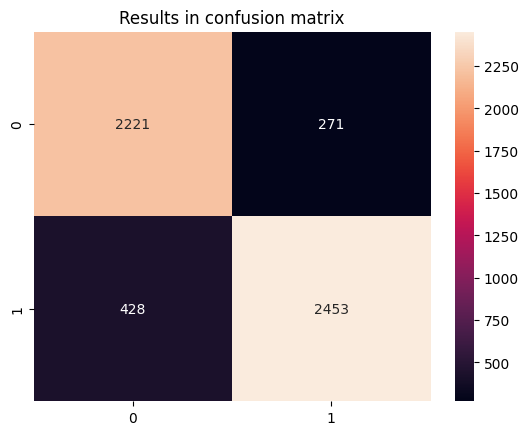

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

confMatrix = confusion_matrix(y_test, predictions)

sns \
    .heatmap(confMatrix, annot=True, fmt='d') \
    .set_title('Results in confusion matrix')

print(classification_report(y_test, predictions))

## Bem, agora vamos documentar e testar outros valores para comprovar que o resultado anterior foi o melhor possivel

### Mas antes, vamos deixar algumas coisas enclarecidas:

1. `max_depth` trabalhará com valores múltiplos de 100 (de 100 a 1000), 
2. `min_samples_split` trabalhará com valores múltiplos de 5 (de 5 a 50),

Com isso, o notebook poderá trabalhar mais efetivamente (*sem interferir muito na acurácia*).

1. Do tipo critério, o `entropy`

In [29]:
# Vamos até o max_depth=500 
for max_depth_loop in range(100, 600, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='entropy', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.8807
Acuracia com intervalo [100, 20] => 0.8148
Acuracia com intervalo [100, 30] => 0.7776
Acuracia com intervalo [100, 40] => 0.7548
Acuracia com intervalo [100, 50] => 0.7384


Acuracia com intervalo [200, 10] => 0.8799
Acuracia com intervalo [200, 20] => 0.8135
Acuracia com intervalo [200, 30] => 0.7778
Acuracia com intervalo [200, 40] => 0.7554
Acuracia com intervalo [200, 50] => 0.7391


Acuracia com intervalo [300, 10] => 0.8798
Acuracia com intervalo [300, 20] => 0.8149
Acuracia com intervalo [300, 30] => 0.7781
Acuracia com intervalo [300, 40] => 0.756
Acuracia com intervalo [300, 50] => 0.7393


Acuracia com intervalo [400, 10] => 0.8801
Acuracia com intervalo [400, 20] => 0.8123
Acuracia com intervalo [400, 30] => 0.7776
Acuracia com intervalo [400, 40] => 0.7555
Acuracia com intervalo [400, 50] => 0.7388


Acuracia com intervalo [500, 10] => 0.8798
Acuracia com intervalo [500, 20] => 0.8141
Acuracia com intervalo [500, 30] => 0.7767
Acur

In [28]:
# Vamos do max_depth=500 ao max_depth=1000
for max_depth_loop in range(600, 1100, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='entropy', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.8794
Acuracia com intervalo [600, 20] => 0.8129
Acuracia com intervalo [600, 30] => 0.7777
Acuracia com intervalo [600, 40] => 0.7554
Acuracia com intervalo [600, 50] => 0.739


Acuracia com intervalo [700, 10] => 0.8808
Acuracia com intervalo [700, 20] => 0.8124
Acuracia com intervalo [700, 30] => 0.7764
Acuracia com intervalo [700, 40] => 0.7549
Acuracia com intervalo [700, 50] => 0.7391


Acuracia com intervalo [800, 10] => 0.8804
Acuracia com intervalo [800, 20] => 0.8143
Acuracia com intervalo [800, 30] => 0.7772
Acuracia com intervalo [800, 40] => 0.7548
Acuracia com intervalo [800, 50] => 0.7391


Acuracia com intervalo [900, 10] => 0.8807
Acuracia com intervalo [900, 20] => 0.8136
Acuracia com intervalo [900, 30] => 0.7778
Acuracia com intervalo [900, 40] => 0.7552
Acuracia com intervalo [900, 50] => 0.7389


Acuracia com intervalo [1000, 10] => 0.8807
Acuracia com intervalo [1000, 20] => 0.8142
Acuracia com intervalo [1000, 30] => 0.7782
A

2. Do tipo critério, o `log_loss`

In [31]:
# Vamos até o max_depth=500
for max_depth_loop in range(100, 600, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='log_loss', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.8793
Acuracia com intervalo [100, 20] => 0.8124
Acuracia com intervalo [100, 30] => 0.7773
Acuracia com intervalo [100, 40] => 0.7552
Acuracia com intervalo [100, 50] => 0.7384


Acuracia com intervalo [200, 10] => 0.8811
Acuracia com intervalo [200, 20] => 0.8132
Acuracia com intervalo [200, 30] => 0.778
Acuracia com intervalo [200, 40] => 0.7552
Acuracia com intervalo [200, 50] => 0.7388


Acuracia com intervalo [300, 10] => 0.8796
Acuracia com intervalo [300, 20] => 0.8132
Acuracia com intervalo [300, 30] => 0.777
Acuracia com intervalo [300, 40] => 0.756
Acuracia com intervalo [300, 50] => 0.739


Acuracia com intervalo [400, 10] => 0.8791
Acuracia com intervalo [400, 20] => 0.8133
Acuracia com intervalo [400, 30] => 0.7781
Acuracia com intervalo [400, 40] => 0.7549
Acuracia com intervalo [400, 50] => 0.7387


Acuracia com intervalo [500, 10] => 0.8794
Acuracia com intervalo [500, 20] => 0.8126
Acuracia com intervalo [500, 30] => 0.7778
Acuraci

In [40]:
# Vamos do max_depth=500 ao max_depth=1000
for max_depth_loop in range(600, 1100, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='log_loss', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(model.score(X_train, y_train), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.8801
Acuracia com intervalo [600, 20] => 0.8133
Acuracia com intervalo [600, 30] => 0.7776
Acuracia com intervalo [600, 40] => 0.756
Acuracia com intervalo [600, 50] => 0.739


Acuracia com intervalo [700, 10] => 0.8798
Acuracia com intervalo [700, 20] => 0.8138
Acuracia com intervalo [700, 30] => 0.7773
Acuracia com intervalo [700, 40] => 0.7555
Acuracia com intervalo [700, 50] => 0.7392


Acuracia com intervalo [800, 10] => 0.8807
Acuracia com intervalo [800, 20] => 0.8138
Acuracia com intervalo [800, 30] => 0.7773
Acuracia com intervalo [800, 40] => 0.7552
Acuracia com intervalo [800, 50] => 0.7391


Acuracia com intervalo [900, 10] => 0.8798
Acuracia com intervalo [900, 20] => 0.8131
Acuracia com intervalo [900, 30] => 0.7774
Acuracia com intervalo [900, 40] => 0.7556
Acuracia com intervalo [900, 50] => 0.7393


Acuracia com intervalo [1000, 10] => 0.8797
Acuracia com intervalo [1000, 20] => 0.8132
Acuracia com intervalo [1000, 30] => 0.7771
Ac

## Bem, com isso, podemos tirar algumas conclusões:

1. Conforme aumentamos o número do `min_samples_split`, menor será a acurácia.
2. O 1° resultado de cada loop é sempre o mais elevado.

Então, vamos documentar os resultados obtidos nos loops

1. Em relação ao critério `entropy` (Melhores Resultados)

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.8807 |
| [200, 10] | 0.8799 |
| [300, 10] | 0.8798 |
| [400, 10] | 0.8801 |
| [500, 10] | 0.8798 |
| [600, 10] | 0.8794 |
| [700, 10] | 0.8808 |
| [800, 10] | 0.8804 |
| [900, 10] | 0.8807 |
| [1000, 10]| 0.8807 |

1. Em relação ao critério `log_loss` (Melhores Resultados)

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.8793 |
| [200, 10] | 0.8811 |
| [300, 10] | 0.8796 |
| [400, 10] | 0.8791 |
| [500, 10] | 0.8794 |
| [600, 10] | 0.8801 |
| [700, 10] | 0.8798 |
| [800, 10] | 0.8807 |
| [900, 10] | 0.8798 |
| [1000, 10]| 0.8797 |